ch4. 7, 8, 11 pg. 244~ 267, 295~ 306

### **[개념정리]**

### **07. LightGBM**

 XGBoost는 학습시간이 오래 걸리고 GridSearchCV로 하이퍼 파라미터 튜닝을 하면 수행시간이 오래 걸림. GBM은 더 걸림

- LightGBM✅:
    - 장점: 더 빠른 학습시간과 예측시간. 메모리 사용량도 적음. 예측 성능 그대로(XGBoost 장점 계승 단점 보완), 카테고리형 피처의 자동 변환과 최적 분할, 대용량 데이터에 대한 병렬 컴퓨팅 기능.
    - 단점: 적은 데이터 세트(10,000건 이하) 적용 시 과적합 가능성 큼

- 트리분할:
   - 균형 트리 분할(대부분 트리 기반 알고리즘): 트리 깊이 최소화, 균형 잡혀 오버피팅에 강함, 시간 오래 걸림
   - 리프 중심 트리 분할(LightGBM)✅: 비대칭 구조, 최대손실값의 리프 노드 지속 분할. 예측 오류 손실 최소화, 시간빠름. 과적합 단점

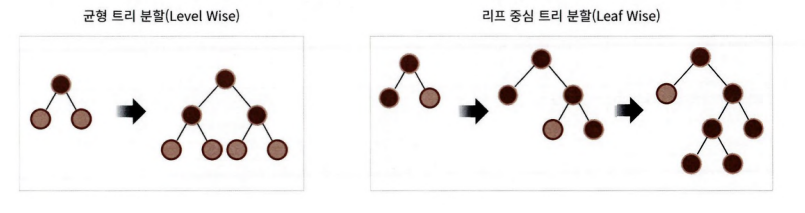

- 사이킷런 래퍼 클래스 제공. 📂lightgbm(LBGMClassifier, LGBMRegressor)


(1) **LightGBM 하이퍼 파라미터**

 트리 깊이가 깊어지므로 제한 파라미터 설정 필요함
- 주요 파라미터📋:

```
- num_iterations: 반복 수행하는 트리 개수 지정. 클수록 예측 성능 높아지나 과적합. 사이킷런에선 n_estimators
- learning_rate: 0-1 업데이트 되는 학습률 값
- max_depth: 깊이 제한
- min_data_in_leaf: 리프 노드 되기 위해 최소한으로 필요한 레코드 수. 과적합 제한. min_child_samples
- num_leaves: 개별 트리의 최대 리프 개수
- boosting: 부스팅의 트리 생성 알고리즘(gbdt/rf)
- bagging_fraction: 데이터 샘플링 비율. 사이킷런에선 subsample
- feature_fraction: 개별 트리 학습 시 무작위로 선택하는 피처의 비율
- lambda_l2: L2 규제 제어, 클수록 과적합 감소. reg_lambda
- lambda_l1: L1 규제 제어, reg_alpha
```
- learning Task 파라미터📋:

```
- objective: 최솟값 가져야할 손실함수
```

(2) 하이퍼 파라미터 튜닝 방안

기본방안🔅:
- num_leaves(클수록 정확도/복잡도/과적합 커짐) 중심으로 min_child_samples, max_depth 조정
- learning_rate 작게, n_estimators 적당히 크게

(3) 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

- 사이킷런 래퍼 LightGBM, XGboost는 많은 하이퍼 파라미터가 같음

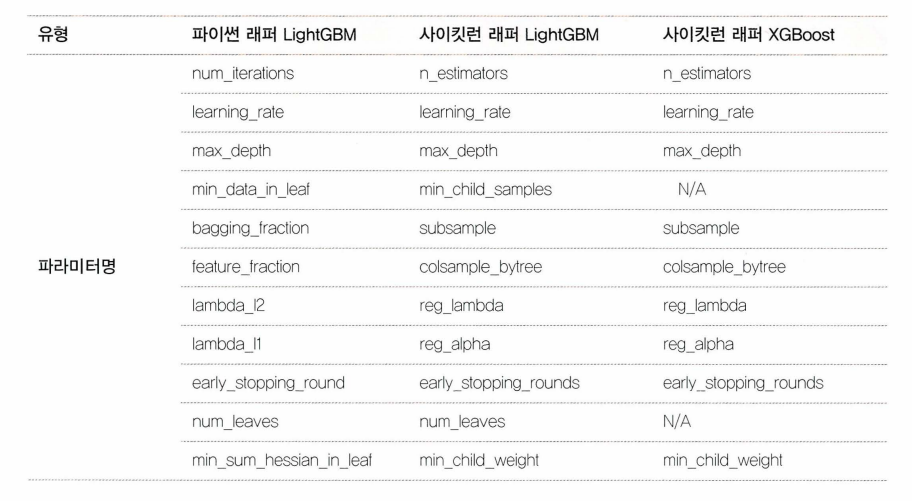


(4) LightGBM 적용 - 위스콘신 유방암 예측

- 조기중단 기능
    - .fit(early_stopping_rounds): 3.3.2버전

- 피처 중요도 시각화 내장 API: plot_importance()

---
### **08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**

- 하이퍼 파라미터 튜닝
   - 사이킷런 제공 GridSearch 방식: 튜닝할 파라미터 많을수록 최적화 수행 시간이 오래 걸림. XGBoost/LightGBM은 많은 시간 소모됨.
- 베이지안 최적화 기법: 대용량 학습 데이터, XGBoost, LightGBM 튜닝에 사용

(1) 베이지안 최적화 개요
- 베이지안 최적화: 베이지안 확률에 기반을 둔 최적화 기법. 새로운 데이터를 입력 받았을 때 최적 함수를 예측하는 사후 모델 개선하며 만든다.
- 대체모델: 획득 함수로부터 최적 함수 예측할 수 있는 입력값 추천 받아 점차적 모델 개선
- 획득함수: 개선된 대체 모델로 최적 입력값 계산(대체모델의 하이터 파라미터)

- 단계: 3-4 반복하면 대페 모델의 불확실설 개선, 정확한 최적 함수 추정 가능

    - step1: 랜덤하게 파라미터 샘플링, 결과 관측
    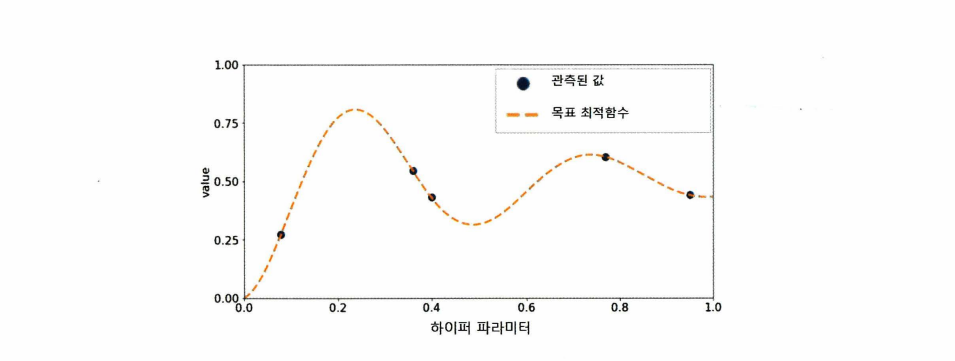

    - step2: 관측값 기반으로 대체 모델은 최적 함수를 추정, y축의 가장 높은 value 가질 때의 하이퍼 파라미터가 최적 관측값
    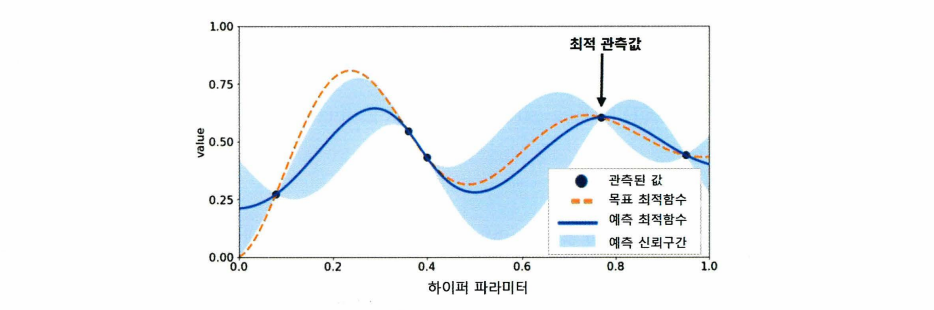

    - step3: 추정 최적 함수 기반으로 획득함수는 다음으로 관측할 하이퍼파라미터 계산. 이전 최적 관측값보다 더 큰 최댓값 가지는 지점으로 전달.
    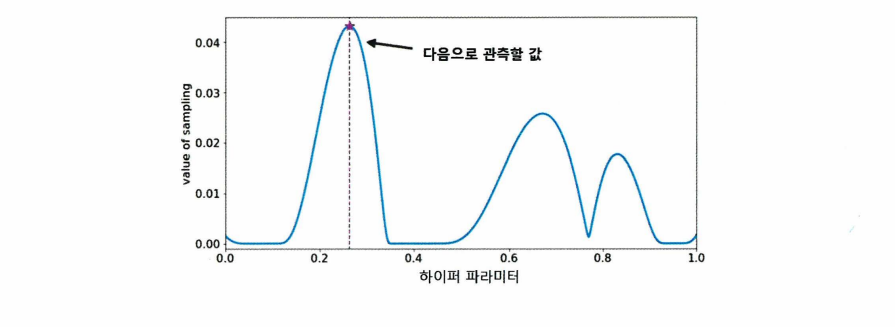

    - step4: 획득함수로부터 받은 하이퍼 파라미터로 수행, 관측값 기반으로 대체 모델 갱신, 다시 최적 함수 예측 추정
    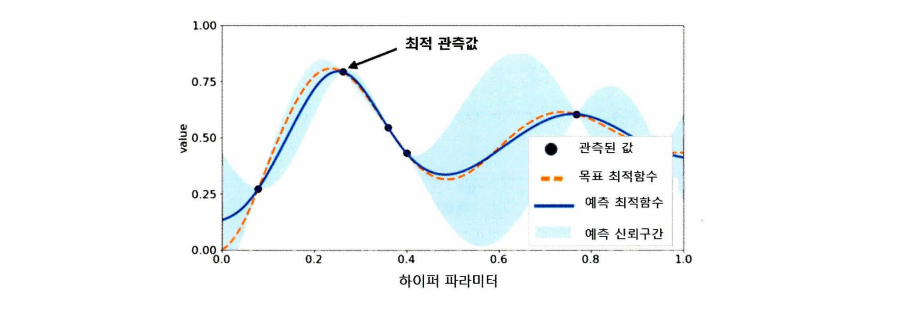

- 최적함수 추정 알고리즘: 가우시안 프로세스, 트리 파르젠 Estimator(HyperOpt에서 사용)


(2) HyperOpt 사용하기

- 베이지안 최적화를 튜닝에 적용하기 위한 파이썬 패키지: HyperOpt, Bayesian Optimization, Optuna

- 순서:

1. 입력 변수 명, 입력값의 검색 공간 설정: 딕셔너리 형태로 입력 {변수: 검색 공간}
   - 검색 공간 제공 함수: hp.quniform(), hp.uniform(), hp.randint(), hp.loguniform(), hp.choice()

2. 목적 함수 생성: 위의 딕셔너리를 인자로 받고, 특정 값 반환하는 구조. 딕셔너리로 반환시 {'loss': -, 'status':-}

3. 검색 공간에서 목적 함수의 반환 **최솟값**을 가지는 최적의 입력값 유추:

  - 베이지안 최적화 기법 기반, fmin(fn=목적함수, space=검색공간 딕셔너리, algo=적용 알고리즘, max_evals=입력값 시도 횟수, trials)
    
  - Trials(): result(반복 수행마다 반환되는 반환값), vals(반복 수행마다 입력되는 입력변수값) -> 최적화 결과 정보 제공

(3) HyperOpt 이용한 XGBoost, 하이퍼 파라미터 최적화

- 목적함수에서 XGBoost 학습 후 예측 성능 결과를 반환값으로 설정

- 주의사항❗:
   1. 정수형(hp.quniform())/실수형(hp.uniform()) 파라미터 구분 => XGBoostClassifier의 파라미터는 정수형만 가능하므로 int형변환 필요

   2. 목적함수는 최솟값으로 최적화하므로 값이 클수록 좋은 성능지표(정확도)의 경우 *-1* 곱한 뒤 반환 => 더 큰 성능 지표가 더 작은 반환값이 되도록 함.

- fmin()으로 최적 하이터 파라미터를 도출, XGBClassifier로 재학습 후 성능 확인하면 좋아진 성능 확인 가능




---
### **11. 스태킹 앙상블**

개별 알고리즘으로 예측한 데이터를 기반으로 최종적 메타 데이터 세트를 만들어 별도 ML알고리즘으로 다시 최종 학습/예측 수행.

 - 메타모델: 개별 모델의 예측된 데이터를 기반으로 다시 학습/예측하는 방식
 - 개별적인 기반 모델 / 최종 메타 모델 두 종류의 모델이 필요
 - 성능이 비슷한 모델 결합해 좀 더 나은 성능 향상 도출할 때 적용
 - 개별 모델로 학습된 예측 레이블을 스태킹 해서 새로운 데이터 세트를 만드는 방식.

 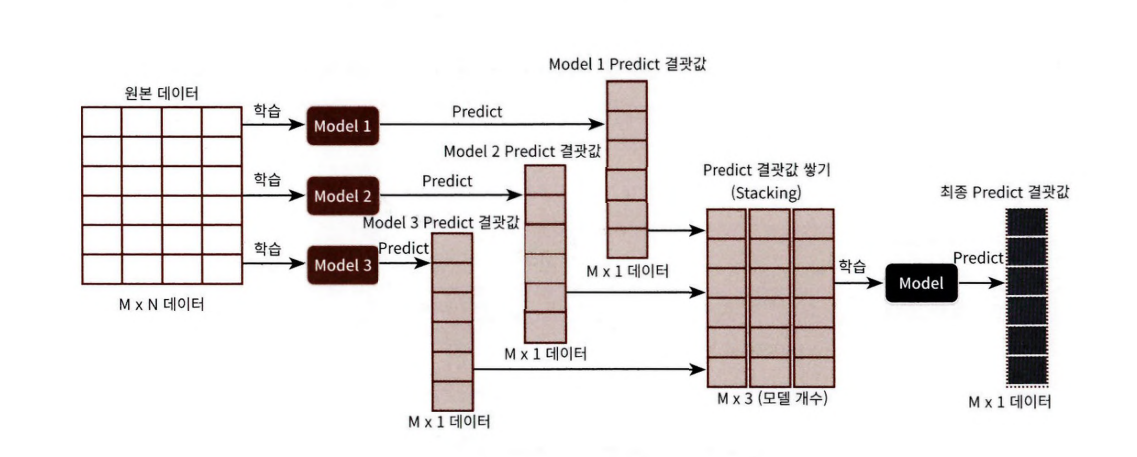

(1) 개별 스태킹 모델

-  1. 개별 ML 모델 객체들 생성, 스태킹으로 만들어질 최종 데이터 세트 학습.예측할 최종 모델 생성
   2. 개별 모델 학습.
   3. 개별 모델의 예측 데이터 세트 반환, 예측 정확도 측정
   4. 예측값들을 ndarray로 붙여 피처 값으로 만들기
   5. 이를 기반으로 최종 메타모델로 학습, 예측 정확도 측정
- 무조건 보장은 아니나 정확도가 개별 모델보다는 향상

(2) CV 세트 기반의 스태킹

과적합을 개선하기 위해 최종(메타 모델을 위한) 데이터 세트를 만들 때 교차검증 기반으로 예측된 결과데이터 세트를 이용함.

- 개별 모델들이 각각 교차검증으로 메타모델을 위해 학습용 스태킹데이터 / 예측 위한 테스트용 스태킹 데이터 생성

- 스텝 1🗒. 각 모델 별 예측값 기반으로 학습용/테스트용 데이터 생성(교차 검증 이용)    
      - 학습용 데이터를 N개의 폴드로 나누고 각각 검증폴드로 전환하며 예측값을 낸 후 스태킹하여 최종 학습 데이터 생성.
      - 각 폴드가 테스트 세트 예측한 결괏값을 최종 평균하여 테스트 데이터 생성      
  스텝 2🗒. 학습용 데이터/테스트용 데이터 각각 스태킹하여 최종 학습용/테스트용 데이터 세트 생성.

- 스태킹은 스태킹을 이루는 모델의 파라미터 튜닝 후 스태킹 하는 것이 일반적임. 개별적으로 각각 모델 최적으로 학습 후 스태킹 모델 최적화

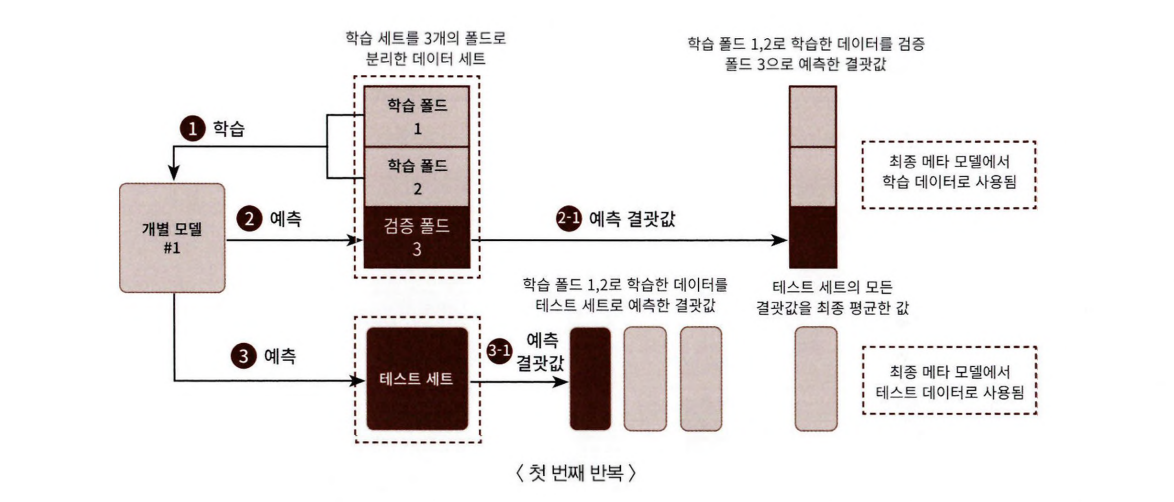

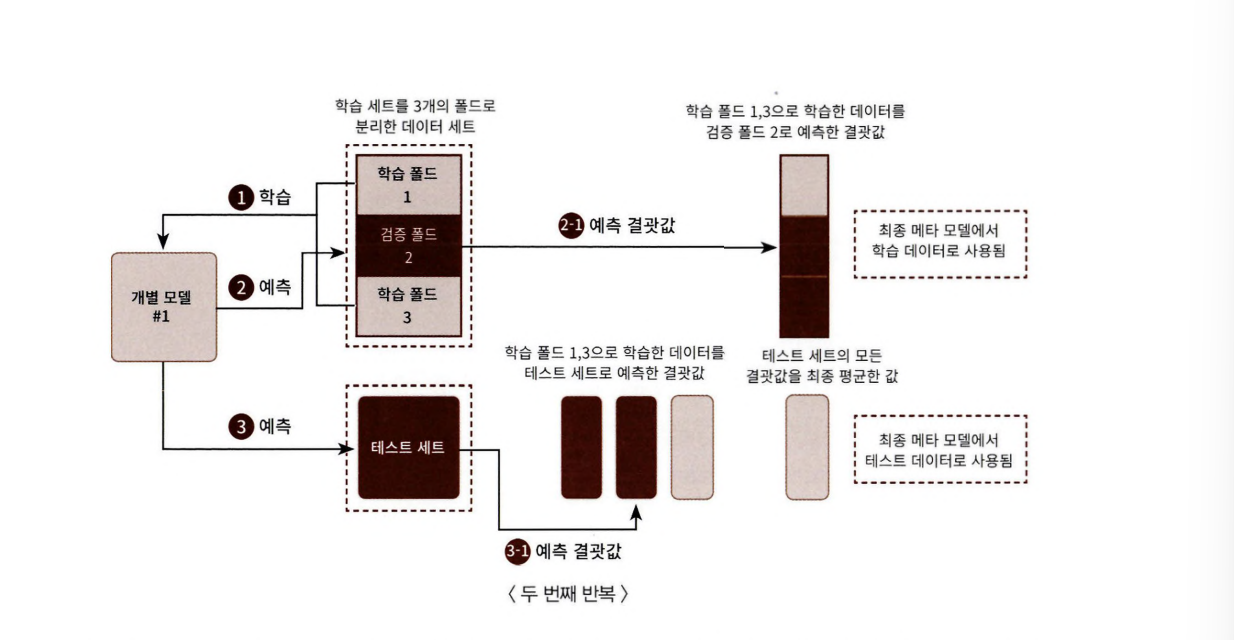

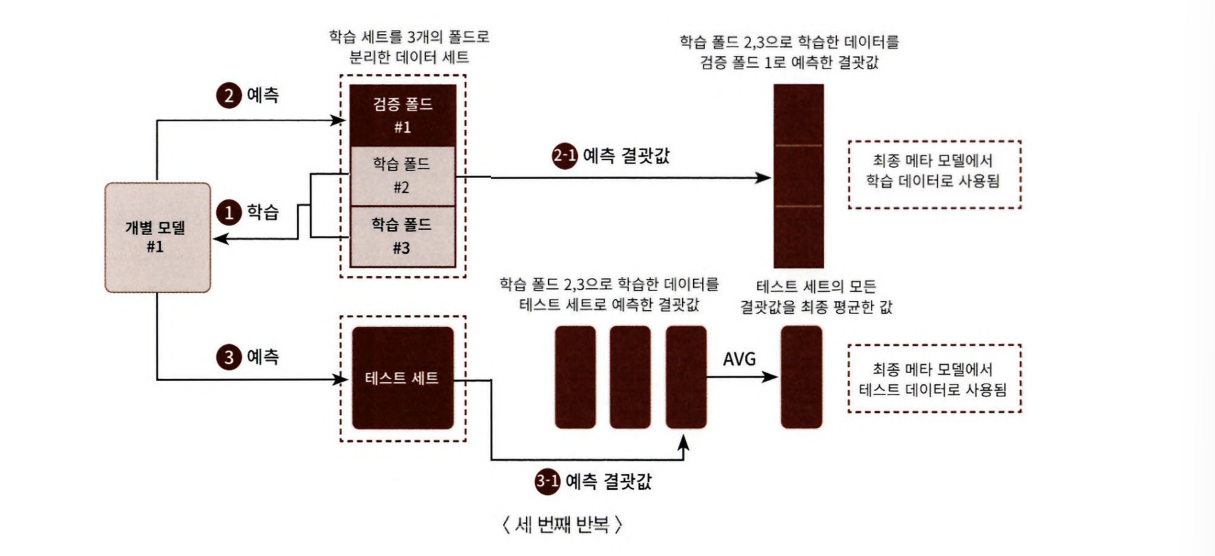

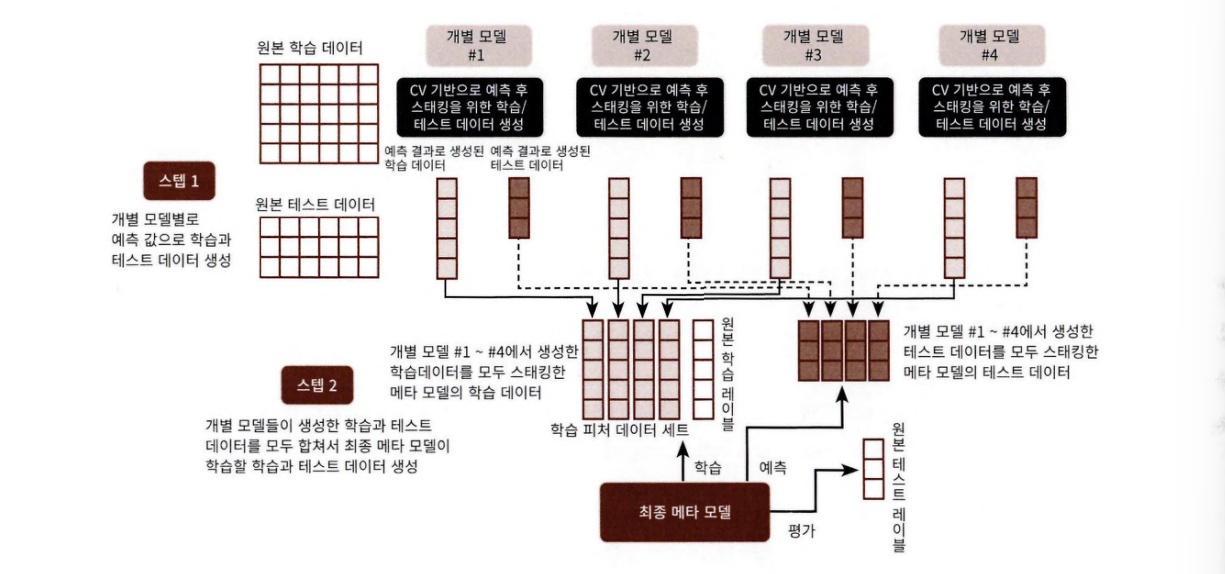

### **[코드 필사]**

 #### LightGBM 적용 - 위스콘신 유방암 예측

In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install lightgbm==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
import lightgbm
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns= dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습, 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 156)

# 앞서 XGBoost와 동일하게 n_estimator는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate =0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr),(X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future releas

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

In [ ]:
# get_clf_eval 함수
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

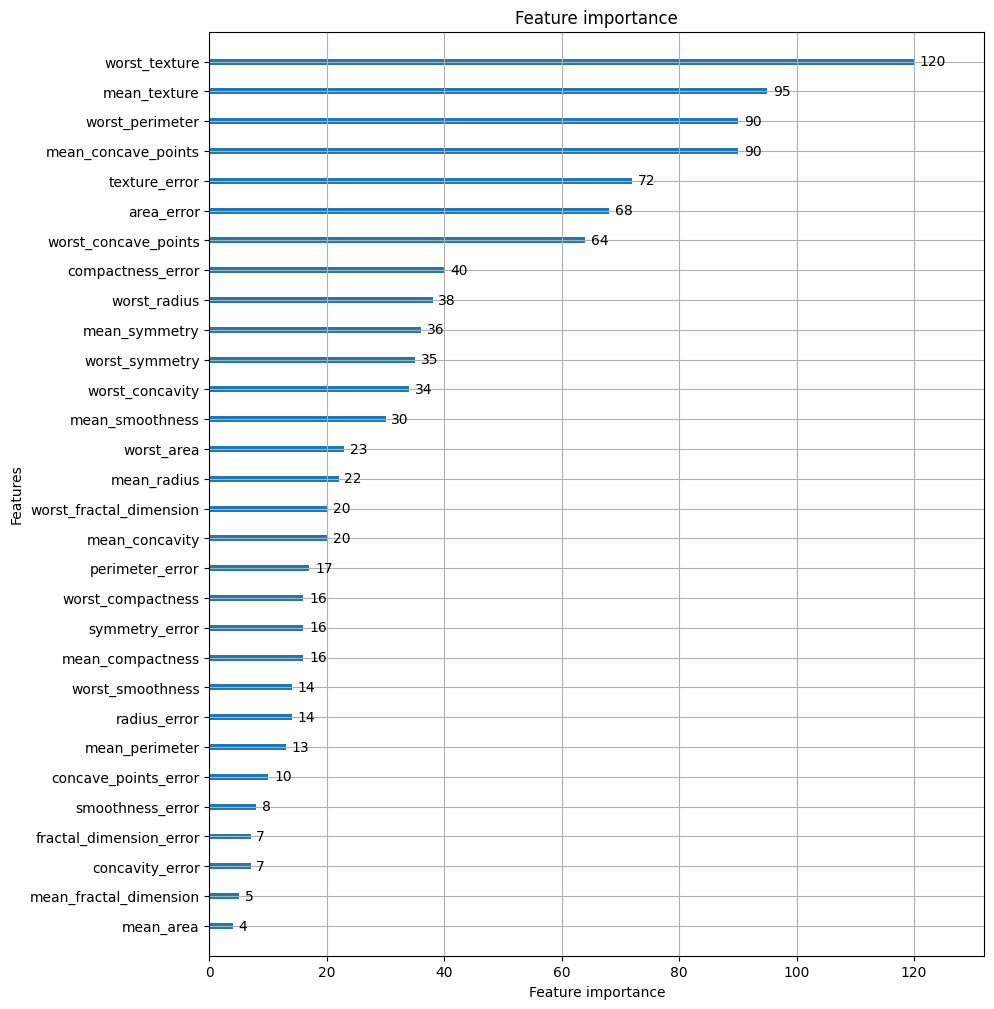

In [ ]:
# 피처 중요도 시각화 내장 API

# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

#### 베이지안 최적화 기반의 HyperOpt

In [ ]:
# Grid Search 방식은 5x4x5x5x4x3 = 6000회의 학습과 평가를 반복함.
params = {
    'max_depth' == [10, 20, 30, 40, 50],
    'num_leaves'== [ 35, 45, 55, 65],
    'colsample_bytree' == [0.5, 0.6, 0.7, 0.8, 0.9],
    'subsample'== [0.5, 0.6, 0.7, 0.8, 0.9],
    'min_child_weight'== [10, 20, 30, 40],
    'reg_alpha' == [0.01, 0.05, 0.1]
}

In [ ]:
pip install hyperopt

In [ ]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력변수 x와 -15~15 1간격 가지는 입력변수 y설정.
search_space = {'x': hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}

In [ ]:
from hyperopt import STATUS_OK

# 목적함수를 생성: 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정값을 반환
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 - 20*y
  return retval

In [ ]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials =trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 597.12trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [ ]:
trial_val =Trials()

# max_evals=20으로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 385.76trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [ ]:
# Trials: fmin()의 인자로 들어가는 Trials객체는 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부 개별 원소는 {'loss':함수 반환값, 'status': 반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [ ]:
# Trials 객체의 vals 속성에 {'입력변수명': 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [ ]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [ loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


- HyperOpt를 이용한 XGBoost 하이터 파라미터 최적화

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state =156)

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [ ]:
# 하이퍼 파라미터 설정
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth',5,20,1),
                    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                    'learning_rate': hp.uniform('learning_rate',0.01,0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree',0.5,1)}

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_FAIL

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.

# 정확도는 높을수록 더 좋은 수치이므로 -1*정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
  # 수행 시간 절약을 위해 nestimator는 100으로 축소
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight = int(search_space['min_child_weight']),
                          learning_rate = search_space['learning_rate'],
                          colsample_bytree = search_space['colsample_bytree'],
                          eval_metric = 'logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv = 3 개수만큼 roc-auc 결과는 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss': -1 * np.mean(accuracy), 'status':STATUS_OK}

In [ ]:
# fmin()으로 최적 하이퍼 파라미터를 도출
from hyperopt import fmin, tpe, trials_from_docs

trial_val = Trials()
best = fmin(fn=objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 50,   # 최대 반복 횟수 지정
            trials = trial_val,
            rstate = np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [01:39<00:00,  2.00s/trial, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5026505409854508, 'learning_rate': 0.19828428817109603, 'max_depth': 15.0, 'min_child_weight': 1.0}


In [ ]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'],5),round(best['learning_rate'],5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.50265, learning_rate:0.19828, max_depth:15, min_child_weight:1


In [ ]:
# 도출된 최적의 파라미터로 XGBClassifier 재학습, 성능 평가
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate = round(best['learning_rate'],5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'],5),
                            eval_metric='logloss', early_stopping_rounds=50)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr,  eval_set=evals, verbose=True)
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.51230	validation_1-logloss:0.55948
[1]	validation_0-logloss:0.40697	validation_1-logloss:0.47575
[2]	validation_0-logloss:0.32809	validation_1-logloss:0.41760
[3]	validation_0-logloss:0.27049	validation_1-logloss:0.37988
[4]	validation_0-logloss:0.22671	validation_1-logloss:0.34438
[5]	validation_0-logloss:0.19305	validation_1-logloss:0.31788
[6]	validation_0-logloss:0.16589	validation_1-logloss:0.30717
[7]	validation_0-logloss:0.14300	validation_1-logloss:0.30056
[8]	validation_0-logloss:0.12355	validation_1-logloss:0.29707
[9]	validation_0-logloss:0.10737	validation_1-logloss:0.28298
[10]	validation_0-logloss:0.09355	validation_1-logloss:0.26801
[11]	validation_0-logloss:0.08250	validation_1-logloss:0.26738
[12]	validation_0-logloss:0.07357	validation_1-logloss:0.26220
[13]	validation_0-logloss:0.06572	validation_1-logloss:0.26240
[14]	validation_0-logloss:0.05892	validation_1-logloss:0.25570
[15]	validation_0-logloss:0.05247	validation_1-logloss:0.25186
[1

### 스태킹 앙상블

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [ ]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9649
랜덤 포레스트 정확도: 0.9035
결정 트리 정확도: 0.9561
에이다부스트 정확도: 0.9561


In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환, 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도:0.9737


- CV 세트 기반의 스태킹

In [ ]:
# 스텝 1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값의로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle = False)

  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  1 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  2 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  3 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  4 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  5 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  6 시작


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# 스텝 2
# np.concatnate()로 여러 넘파이 배열 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도:0.9737
